In [1]:
%matplotlib inline
import seaborn
import pandas

# Pandas: Combining Datasets

- [Pandas documentation: Merging](http://pandas.pydata.org/pandas-docs/stable/merging.html)

Pandas allows us to combine two sets of data using `merge`, `join`, and `concat`.

In [2]:
df = pandas.read_csv('data/red_wine.csv', delimiter=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

`get_dummies` converts a categorical variable into indicator variables, i.e. 1 or 0.

In [4]:
quality_dummies = pandas.get_dummies(df['quality'], prefix='quality')
quality_dummies.head()

,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


Join this new data frame with the original, row for row:

In [5]:
joined_df = df.join(quality_dummies)
joined_df.head() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0,1,0,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,0,1,0,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,0,1,0,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,0,0,1,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0,1,0,0,0


We can accomplish something similar with `concat`:

In [6]:
joined_df2 = pandas.concat([quality_dummies, df], axis=1)
joined_df2.head()

,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,0,1,0,0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,0,0,1,0,0,0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,0,0,1,0,0,0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,0,0,0,1,0,0,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,0,0,1,0,0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Let's combine multiple data sources.

In [7]:
red_wines_df = pandas.read_csv('data/red_wine.csv', delimiter=';')
white_wines_df = pandas.read_csv('data/white_wine.csv', delimiter=';')

In [8]:
red_wines_quality_df = red_wines_df.groupby('quality').mean()['fixed acidity'].reset_index()
red_wines_quality_df

,quality,fixed acidity
0,3,8.360000
1,4,7.779245
2,5,8.167254
3,6,8.347179
4,7,8.872362
5,8,8.566667


In [9]:
white_wines_quality_df = white_wines_df.groupby('quality').mean()['fixed acidity'].reset_index()
white_wines_quality_df

,quality,fixed acidity
0,3,7.600000
1,4,7.129448
2,5,6.933974
3,6,6.837671
4,7,6.734716
5,8,6.657143
6,9,7.420000


In [10]:
pandas.merge(red_wines_quality_df, white_wines_quality_df, on=['quality'], suffixes=[' red', ' white'])

,quality,fixed acidity red,fixed acidity white
0,3,8.360000,7.600000
1,4,7.779245,7.129448
2,5,8.167254,6.933974
3,6,8.347179,6.837671
4,7,8.872362,6.734716
5,8,8.566667,6.657143


## Pivot Tables

- [Wikipedia: Pivot Table](https://en.wikipedia.org/wiki/Pivot_table)
- [Pandas documentation: Reshaping and Pivot Tables](http://pandas.pydata.org/pandas-docs/stable/reshaping.html)

Let's take another look at the `fixed acidity` column.

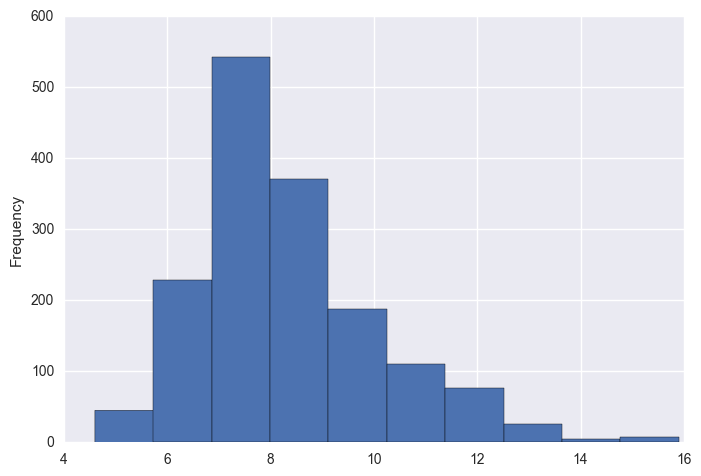

In [11]:
red_wines_df['fixed acidity'].plot.hist()

`cut` allows us to turn a column with continuous data into categoricals by specifying bins to place them in.

In [12]:
fixed_acidity_class = pandas.cut(red_wines_df['fixed acidity'], bins=range(4, 17), labels=range(4, 16))
fixed_acidity_class.head(20)

0      7
1      7
2      7
3     11
4      7
5      7
6      7
7      7
8      7
9      7
10     6
11     7
12     5
13     7
14     8
15     8
16     8
17     8
18     7
19     7
Name: fixed acidity, dtype: category
Categories (12, int64): [4 < 5 < 6 < 7 ... 12 < 13 < 14 < 15]

In [13]:
fixed_acidity_class.name = 'fa_class'
red_wines_df = pandas.concat([red_wines_df, fixed_acidity_class], axis=1)

In [14]:
red_wines_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,fa_class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,7
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,7
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,7
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,11
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,7


Get the mean residual sugar for each quality category/fixed acidity pair using a pivot_table. `mean` is the default agregation function.

In [15]:
pandas.pivot_table(red_wines_df, values='residual sugar', index='quality', columns='fa_class')

fa_class,4,5,6,7,8,9,10,11,12,13,14,15
quality,,,,,,,,,,,,
3,NaN,NaN,1.500000,3.537500,3.400000,NaN,1.800000,2.200000,NaN,NaN,NaN,NaN
4,1.75,5.300000,2.714286,2.453846,2.583333,2.433333,2.566667,1.500000,4.500000,NaN,NaN,NaN
5,1.60,1.850000,2.492623,2.441331,2.496786,2.675000,3.238889,2.770000,2.393333,3.133333,NaN,5.025
6,2.35,2.886538,2.556767,2.167027,2.281731,2.801562,2.910345,2.524359,2.912500,2.850000,1.8,NaN
7,2.10,1.900000,2.595000,2.655000,2.796429,2.862500,2.718000,2.638889,4.150000,2.800000,2.2,3.700
8,2.00,1.600000,NaN,2.316667,1.800000,2.166667,3.866667,5.200000,2.200000,NaN,NaN,NaN


Change the aggregation function to `max`:

In [16]:
pandas.pivot_table(red_wines_df, values='residual sugar', index='quality', 
                   columns='fa_class', aggfunc=max)

fa_class,4,5,6,7,8,9,10,11,12,13,14,15
quality,,,,,,,,,,,,
3,NaN,NaN,1.8,5.7,3.4,NaN,2.10,2.20,NaN,NaN,NaN,NaN
4,2.1,12.9,5.6,4.4,6.3,3.4,3.40,1.60,4.5,NaN,NaN,NaN
5,1.6,2.5,7.9,8.1,7.9,13.8,15.50,5.15,4.6,4.8,NaN,7.5
6,4.3,13.9,10.7,5.5,5.1,11.0,15.40,6.20,4.3,3.8,1.8,NaN
7,2.1,2.2,6.0,8.3,6.2,8.9,6.55,4.40,5.8,2.8,2.2,3.7
8,2.0,1.8,NaN,3.6,1.8,2.8,6.40,5.20,2.2,NaN,NaN,NaN


Change the aggregation function to `min`:

In [17]:
pandas.pivot_table(red_wines_df, values='residual sugar', index='quality', 
                   columns='fa_class', aggfunc=min)

fa_class,4,5,6,7,8,9,10,11,12,13,14,15
quality,,,,,,,,,,,,
3,NaN,NaN,1.2,2.1,3.4,NaN,1.5,2.2,NaN,NaN,NaN,NaN
4,1.4,1.5,1.6,1.3,1.5,1.6,2.1,1.4,4.5,NaN,NaN,NaN
5,1.6,1.4,1.4,1.3,1.2,1.3,1.9,1.8,1.4,1.9,NaN,4.2
6,1.2,1.2,1.4,0.9,1.3,1.5,1.4,1.4,2.0,2.2,1.8,NaN
7,2.1,1.2,1.4,1.2,1.7,1.4,1.6,1.4,2.3,2.8,2.2,3.7
8,2.0,1.4,NaN,1.7,1.8,1.8,2.6,5.2,2.2,NaN,NaN,NaN
